In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.utils import py_random_state
from networkx.generators.random_graphs import _random_subset
from networkx.generators.classic import star_graph
import numpy as np
import random

import scipy.stats as stats
from scipy.optimize import curve_fit


import time
import os

Per via di problemi dovuti alle versioni delle librerie di networkx installate abbiamo aggiunto la funzione della libreria nel file per poterla usare senza preoccuparci delle versioni. La funzione originale può essere trovata nella documentazione della libreria al link https://networkx.org/documentation/stable/_modules/networkx/generators/random_graphs.html#barabasi_albert_graph

In [2]:
@py_random_state(2)
def barabasi_albert(n, m, seed=None, initial_graph=None):
    if m < 1 or m >= n:
        raise nx.NetworkXError(
            f"Barabási–Albert network must have m >= 1 and m < n, m = {m}, n = {n}"
        )

    if initial_graph is None:
        G = star_graph(m)
    else:
        if len(initial_graph) < m or len(initial_graph) > n:
            raise nx.NetworkXError(
                f"Barabási–Albert initial graph needs between m={m} and n={n} nodes"
            )
        G = initial_graph.copy()

    repeated_nodes = [n for n, d in G.degree() for _ in range(d)]
    source = len(G)
    while source < n:
        targets = _random_subset(repeated_nodes, m, seed)
        G.add_edges_from(zip([source] * m, targets))
        repeated_nodes.extend(targets)
        repeated_nodes.extend([source] * m)

        source += 1
    return G

In [3]:
def linear_search(lys, element):
    for i in range(len(lys)):
        if lys[i] == element:
            return i
    return -1

seed = np.random.RandomState()
def exploration_time (G, explorations_per_graph):
    start_node = _random_subset(G.nodes, 1, seed).pop()
        
    def exploration(node, G, explored_nodes):
        if linear_search(explored_nodes, node) < 0:
            explored_nodes += [node]
        neighbours = list(G[node])
        new_node = _random_subset(neighbours, 1, seed).pop()
        return new_node

    exploration_time = []
    explored_nodes = []
    
    for i in range(explorations_per_graph):
        t = 0
        while True:
            start_node = exploration(start_node, G, explored_nodes)

            if len(explored_nodes) == len(G.nodes):
                exploration_time += [t]
                explored_nodes.clear()
                break
            t += 1

    mean_exploration_time = sum(exploration_time)/explorations_per_graph
    print("Mean exploration time:", mean_exploration_time, "for", len(G.nodes) ,"nodes")

    return mean_exploration_time

In [4]:
time_steps = int(1e5) 
explorations_per_graph = 2

## Exploration for random graph

In funzione del numero di nodi t(N)

In [5]:
N = [20+i*200 for i in range(20)] # vettore dei nodi dei diversi grafi
P = 0.25
Times = []

# per ogni N creo un grafo e faccio una media dei tempi di esplorazione che plotto in funzione di N    
for i in range(len(N)):
    G = nx.erdos_renyi_graph(N[i], P)
    while min([d for n, d in G.degree()]) == 0:
          G = nx.erdos_renyi_graph(N[i], P)
            
    Times += [exploration_time(G, explorations_per_graph)]  


Mean exploration time: 90.5 for 20 nodes
Mean exploration time: 2023.0 for 220 nodes
Mean exploration time: 3232.0 for 420 nodes
Mean exploration time: 4423.5 for 620 nodes
Mean exploration time: 5046.5 for 820 nodes
Mean exploration time: 7227.5 for 1020 nodes
Mean exploration time: 7930.0 for 1220 nodes
Mean exploration time: 9995.5 for 1420 nodes
Mean exploration time: 15120.0 for 1620 nodes
Mean exploration time: 13055.0 for 1820 nodes
Mean exploration time: 16511.0 for 2020 nodes
Mean exploration time: 18247.5 for 2220 nodes
Mean exploration time: 22389.0 for 2420 nodes
Mean exploration time: 24123.0 for 2620 nodes
Mean exploration time: 25311.5 for 2820 nodes
Mean exploration time: 30107.5 for 3020 nodes
Mean exploration time: 28143.5 for 3220 nodes
Mean exploration time: 31176.0 for 3420 nodes
Mean exploration time: 33193.0 for 3620 nodes
Mean exploration time: 31673.5 for 3820 nodes


[    9.33861278 -1479.18654135]


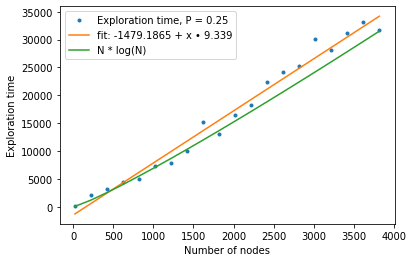

In [7]:
def log_law(x):
    return x*np.log(x)

linear_fit=np.polyfit(N,Times,1)

print(linear_fit)

fit = [linear_fit[0]*n+linear_fit[1] for n in N]
fit_function = log_law(N)

fig, ax = plt.subplots()
    
ax.plot(N, Times, '.', label = f"Exploration time, P = {P}")
ax.plot(N, fit, '-', label = f"fit: {round(linear_fit[1],4)} + x • {round(linear_fit[0],3)}")
ax.plot(N, fit_function, '-', label = f"N * log(N)")

ax.set_xlabel("Number of nodes")
ax.set_ylabel(f"Exploration time")

ax.legend()

plt.show()

## Exploration for scale-free graph

In funzione del numero di nodi t(N)

In [9]:
N = [20+i*200 for i in range(20)]
M = 4
Times = []

G = nx.complete_graph(M)

for i in range(len(N)):
    G = barabasi_albert(N[i], M, initial_graph = G)
    Times += [exploration_time(G, explorations_per_graph)]  

Mean exploration time: 145.0 for 20 nodes
Mean exploration time: 2709.0 for 220 nodes
Mean exploration time: 5059.0 for 420 nodes
Mean exploration time: 8138.5 for 620 nodes
Mean exploration time: 14230.0 for 820 nodes
Mean exploration time: 14000.5 for 1020 nodes
Mean exploration time: 21041.5 for 1220 nodes
Mean exploration time: 23303.0 for 1420 nodes
Mean exploration time: 24207.5 for 1620 nodes
Mean exploration time: 31101.0 for 1820 nodes
Mean exploration time: 45435.5 for 2020 nodes
Mean exploration time: 38343.5 for 2220 nodes
Mean exploration time: 38187.0 for 2420 nodes
Mean exploration time: 40617.5 for 2620 nodes
Mean exploration time: 53698.5 for 2820 nodes
Mean exploration time: 58613.5 for 3020 nodes
Mean exploration time: 55110.5 for 3220 nodes
Mean exploration time: 52829.0 for 3420 nodes
Mean exploration time: 67797.0 for 3620 nodes
Mean exploration time: 70080.5 for 3820 nodes


[-9.12900118e-08  7.17759865e-04  1.68026112e+01 -1.28371409e+03]


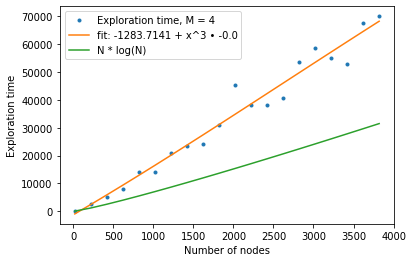

In [10]:
def log_law(x):
    return x*np.log(x)

linear_fit=np.polyfit(N,Times,3)
print(linear_fit)

fit = [linear_fit[0]*n**3+linear_fit[1]*n**2+linear_fit[2]*n+linear_fit[3] for n in N]
fit_function = log_law(N)

fig, ax = plt.subplots()
    
ax.plot(N, Times, '.', label = f"Exploration time, M = {M}")
ax.plot(N, fit, '-', label = f"fit: {round(linear_fit[3],4)} + x^3 • {round(linear_fit[0],3)}")
ax.plot(N, fit_function, '-',
        label = f"N * log(N)")

ax.set_xlabel("Number of nodes")
ax.set_ylabel(f"Exploration time")

ax.legend()

plt.show()